In [52]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import plotting

In [37]:
paris_data = pd.read_csv("../Data/full_paris_emolex_modified.csv")
gnd_data = pd.read_csv("../Data/full_gnd_emolex_modified.csv")

In [38]:
gnd_data["created_at"] = pd.to_datetime(gnd_data["created_at"])
mm = gnd_data.groupby('created_at').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})

In [42]:
paris_data["created_at"] = pd.to_datetime(paris_data["created_at"])
mm_paris = paris_data.groupby('created_at').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})

In [43]:

#resample by "W" for week or "M" for Month 
n = mm.resample('W').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})

n.head(22)

#if you want it to have connections between tweets 
n = n.dropna()

In [44]:
#resample by "W" for week or "M" for Month 
n = mm_paris.resample('W').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})

n.head(22)

#if you want it to have connections between tweets 
n = n.dropna()

In [45]:
n['num_tweets'] = n['id_str']
n['average_sentiment'] = (n['positive'] + -n['negative'])/2

dd = n[['num_tweets','average_sentiment']]

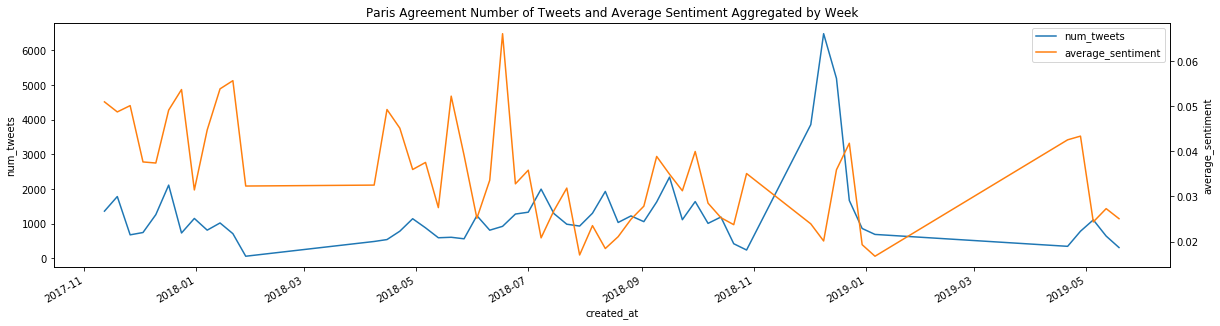

In [47]:
plot_multi(dd, figsize=(20, 5))

In [46]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_matplotlib').style, '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0], **kwargs)
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()
    
    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    plt.title('Paris Agreement Number of Tweets and Average Sentiment Aggregated by Week')
    ax.legend(lines, labels, loc=0)
    plt.show()
    return ax

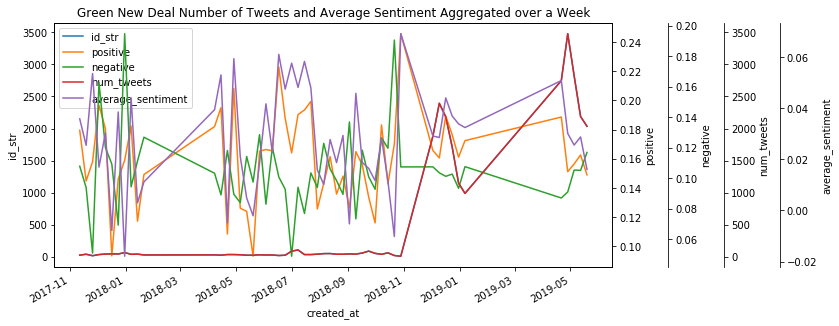

In [28]:
plot_multi(n, figsize=(20, 5))

In [29]:
n['num_tweets'] = n['id_str']
n['average_sentiment'] = (n['positive'] + -n['negative'])/2

dd = n[['num_tweets','average_sentiment']]

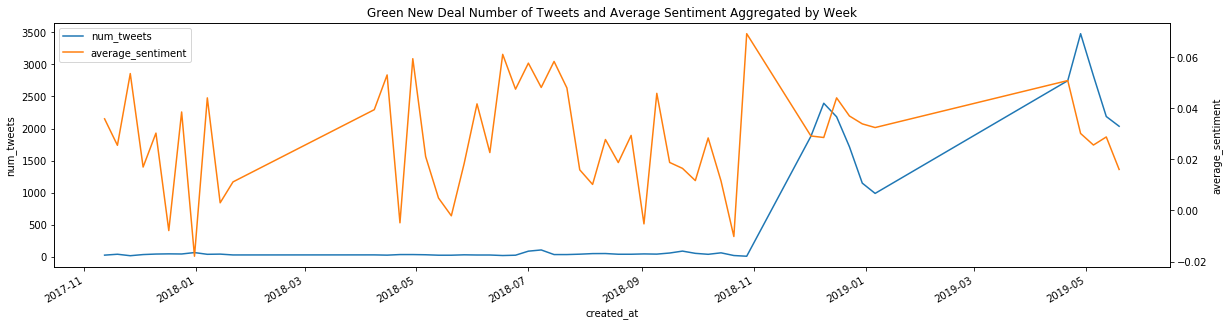

In [41]:
plot_multi(dd, figsize=(20, 5))

In [49]:
## If we want to just look at the time values in the center 

#resample by "W" for week or "M" for Month 
l = mm.resample('W').agg({'id_str': 'count' , 'positive' : 'mean', 'negative': 'mean'})
l = l[21:]
l.tail(25)

l = l[:40]
l = l.dropna()

In [50]:
l['num_tweets'] = l['id_str']
l['average_sentiment'] = (l['positive'] + -l['negative'])/2

dd = l[['num_tweets','average_sentiment']]

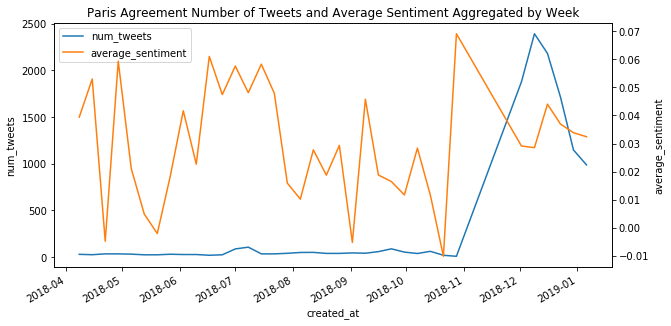

In [51]:
plot_multi(dd, figsize=(10, 5))
